# 数据准备

Text(0.5, 1.0, '原始数据')

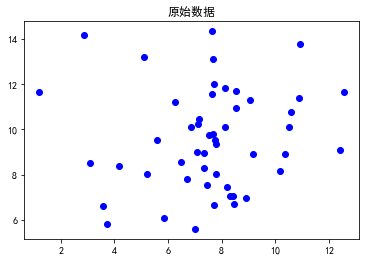

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 生成一个样本量为50、分类数为1、标准差为1的数据集
X,y = make_blobs(n_samples=50,centers=1,cluster_std=2,random_state=8)

plt.scatter(X[:,0],X[:,1],c='blue')
plt.title('原始数据')

# 数据标准化

## 均值方差标准化

Text(0.5, 1.0, 'StandardScaler预处理后数据')

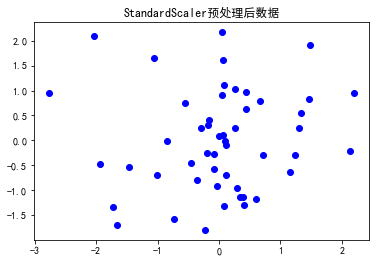

In [2]:
from sklearn.preprocessing import StandardScaler

# 使用StandardScaler进行数据处理
scaler = StandardScaler().fit(X)
X_1 = scaler.transform(X)
# 也可以使用StandardScaler.fit_transfrom(X)一步到位得到X_1

plt.scatter(X_1[:,0],X_1[:,1],c='blue')
plt.title('StandardScaler预处理后数据')

## 离差标准化

Text(0.5, 1.0, 'MinMaxScaler预处理后数据')

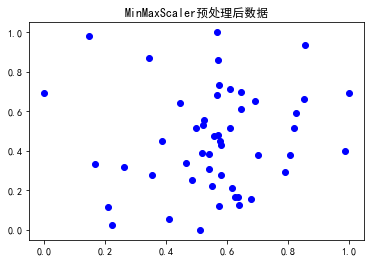

In [3]:
from sklearn.preprocessing import MinMaxScaler

# 使用StandardScaler进行数据处理
X_2 = MinMaxScaler().fit_transform(X)

plt.scatter(X_2[:,0],X_2[:,1],c='blue')
plt.title('MinMaxScaler预处理后数据')

## 二值化处理

In [4]:
import numpy as np
from sklearn.preprocessing import Binarizer

data = np.array([
    [3,-1.5,   2,-5.4],
    [0,   4,-0.3, 2.1],
    [1, 3.3,-1.9,-4.3]
])

data_binarized = Binarizer(threshold=1.4).transform(data)
data_binarized

array([[1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [0., 1., 0., 0.]])

## 归一化处理

Text(0.5, 1.0, 'Normalizer预处理后数据，默认L2范数')

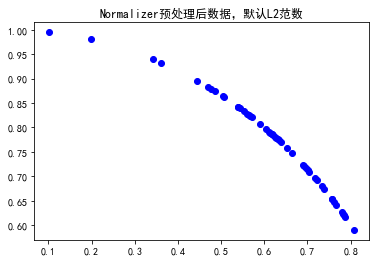

In [5]:
from sklearn.preprocessing import Normalizer
# 使用Normalizer进行数据处理，默认范数为‘L2’
# 将所有样本的特征向量转化为欧几里得距离为1，通常只想保留数据特征向量的方向，而忽略其数值的时候使用
X_3 = Normalizer().fit_transform(X)

plt.scatter(X_3[:,0],X_3[:,1],c='blue')
plt.title('Normalizer预处理后数据，默认L2范数')

Text(0.5, 1.0, 'Normalizer预处理后数据，L1范数')

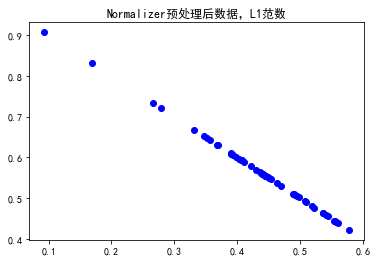

In [6]:
# 使用Normalizer进行数据处理，使用范数为‘L1’
X_4 = Normalizer(norm='l1').fit_transform(X)

plt.scatter(X_4[:,0],X_4[:,1],c='blue')
plt.title('Normalizer预处理后数据，L1范数')

## 独热编码处理

In [7]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

data_type = np.array([
    [0,1],
    [1,3],
    [2,0],
    [1,2]
])
# 进行独热编码
encoder = OneHotEncoder(categories='auto').fit(data_type)
data_encoded = encoder.transform(data_type).toarray()
print("编码后的数据：\n",data_encoded)

编码后的数据：
 [[1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0.]]


In [8]:
# OneHotEncoder只能用于整数数据，如果是非整型数据，就需要先进行数据转换，然后进行独热编码
import numpy as np
# 定义一个随机数的数组
np.random.seed(38)
arr = np.random.uniform(-5,5,size=20)
# 设置箱体数为5
bins = np.linspace(-5,5,6) # 生成六个元素的等差数列，中间就有5个箱子，所有数据放在不同的区间（箱子）里面，用箱子号表示数据点所在组
# 将数据进行装箱操作，np.digitize函数将数值转换为分类型数组，也就是对数据进行离散化处理，或者装箱处理
target_bin = np.digitize(arr,bins=bins)
# 输出装箱数据范围
print('装箱数据范围：\n{}'.format(bins))
print('\n数据点的特征值：\n{}'.format(arr))
print('\n数据点所在组：\n{}'.format(target_bin))
# 将所有数放在不同的箱子里，至此生成了一组离散的值

# 接下来进行独热编码处理
from sklearn.preprocessing import OneHotEncoder
target_bin = target_bin.reshape(-1,1)
onehot = OneHotEncoder(sparse=False,categories='auto')
onehot.fit(target_bin)
# 使用独热编码转化数据
arr_in_bin = onehot.transform(target_bin)
# 输出结果
print('\n装箱编码后的数据维度：{}'.format(arr_in_bin.shape))
print('\n装箱编码后的数据值：{}'.format(arr_in_bin))

装箱数据范围：
[-5. -3. -1.  1.  3.  5.]

数据点的特征值：
[-1.1522688   3.59707847  4.44199636  2.02824894  1.33634097  1.05961282
 -2.99873157 -1.12612112 -2.41016836 -4.25392719 -2.19043025 -0.61565849
 -0.16750956  3.68489486  0.29629384  0.62263144 -0.28944656  1.88842007
  0.04828605  3.23175755]

数据点所在组：
[2 5 5 4 4 4 2 2 2 1 2 3 3 5 3 3 3 4 3 5]

装箱编码后的数据维度：(20, 5)

装箱编码后的数据值：[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]]


## 数据降维处理

### 导入数据

In [9]:
# 导入鸢尾花数据
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
print("iris数据集维度：",X.shape)
print("iris前五行数据：\n",X[:5])

iris数据集维度： (150, 4)
iris前五行数据：
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


### 指定特征维度降维

In [10]:
# 指定特征数的降维
from sklearn.decomposition import PCA
# 指定保留的特征数为3
pca_num = PCA(n_components=3)
# 训练PCA模型
pca_num.fit(X)
# 对样本数据进行降维
X_pca1 = pca_num.transform(X)
# 查看降维结果
print('对iris数据集进行指定特征数的降维后的维度为：',X_pca1.shape)
print("对iris数据集进行指定特征数的降维后的前五行数据：\n",X_pca1[:5])

对iris数据集进行指定特征数的降维后的维度为： (150, 3)
对iris数据集进行指定特征数的降维后的前五行数据：
 [[-2.68412563  0.31939725 -0.02791483]
 [-2.71414169 -0.17700123 -0.21046427]
 [-2.88899057 -0.14494943  0.01790026]
 [-2.74534286 -0.31829898  0.03155937]
 [-2.72871654  0.32675451  0.09007924]]


In [11]:
import numpy as np
print("进行指定特征数的降维后的最大方差成分：")
for i in range(pca_num.components_.shape[0]):
    arr = np.around(pca_num.components_[i],2)
    print("components{0}:{1}".format((i+1),[x for x in arr]))

进行指定特征数的降维后的最大方差成分：
components1:[0.36, -0.08, 0.86, 0.36]
components2:[0.66, 0.73, -0.17, -0.08]
components3:[-0.58, 0.6, 0.08, 0.55]


In [12]:
var = np.around(pca_num.explained_variance_,2)
print("进行指定特征数的降维后的各主成分的方差为：",var)
var_ratio = np.around(pca_num.explained_variance_ratio_,2)
print("进行指定特征数的降维后的各主成分的方差为：",var_ratio)

进行指定特征数的降维后的各主成分的方差为： [4.23 0.24 0.08]
进行指定特征数的降维后的各主成分的方差为： [0.92 0.05 0.02]


### 指定方差百分比降维

In [13]:
# 指定保留的方差百分比为0.95
pca_per = PCA(n_components=0.95)
# 训练PCA模型
pca_per.fit(X)
# 对样本数据进行降维
X_pca2 = pca_per.transform(X)
# 查看降维结果
print("对iris数据集进行方差百分比的降维后的维度为：",X_pca2.shape)
print("对iris数据集进行方差百分比的降维后的前五行数据：\n",X_pca2[:5])

对iris数据集进行方差百分比的降维后的维度为： (150, 2)
对iris数据集进行方差百分比的降维后的前五行数据：
 [[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


In [14]:
print("进行方差百分比降维后的最大方差成分：")
for i in range(pca_per.components_.shape[0]):
    arr = np.around(pca_per.components_[i],2)
    print("components{0}:{1}".format((i+1),[x for x in arr]))

进行方差百分比降维后的最大方差成分：
components1:[0.36, -0.08, 0.86, 0.36]
components2:[0.66, 0.73, -0.17, -0.08]


In [ ]:
var = np.around(pca_num.explained_variance_,2)
print("进行指定特征数的降维后的各主成分的方差为：",var)
var_ratio = np.around(pca_num.explained_variance_ratio_,2)
print("进行指定特征数的降维后的各主成分的方差为：",var_ratio)

# 红酒数据集拆分、标准化和降维处理

## 导入wine数据集

In [24]:
from sklearn.datasets import load_wine
import numpy as np
# 加载wine数据集
wine = load_wine()
# data是特征数据
X = wine.data
# target是目标变量数据（酒的类别标签）
y = wine.target
# 查看特征数据维度
print("wine数据集的维度为：",X.shape)
# 查看酒的类别
print("wine数据集的类型标签为：",np.unique(y))
print("wine数据集前五行数据为：\n",X[:5])

wine数据集的维度为： (178, 13)
wine数据集的类型标签为： [0 1 2]
wine数据集前五行数据为：
 [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


## 将wine数据集拆分为训练集和测试集

In [27]:
# 导入数据集拆分工具
from sklearn.model_selection import train_test_split
# 将数据集拆分为训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=8)
# 输出训练数据集中特征向量的形态
print("训练集数据维度：",X_train.shape)
# 输出训练数据集中目标标签的形态
print("训练集标签维度：",y_train.shape)
# 输出测试数据集中特征向量的形态
print("测试集数据维度：",X_test.shape)
# 输出测试集数据中目标标签的形态
print("训练集标签维度：",y_test.shape)

训练集数据维度： (133, 13)
训练集标签维度： (133,)
测试集数据维度： (45, 13)
训练集标签维度： (45,)


## 对数据集进行标准化处理

In [32]:
# 导入StandardScaler
from sklearn.preprocessing import StandardScaler
# 对数据集进行拟合
scaler = StandardScaler().fit(X_train)
# 对数据集进行转化
X_train_scaled = scaler.transform(X_train)
# 对测试集数据进行转换
X_test_scaled = scaler.transform(X_test)
print("标准化前训练集数据的最小值和最大值：{0}，{1}".format(X_train.min(),X_train.max()))
print("标准化后训练集数据的最小值和最大值：{0}，{1}".format(X_train_scaled.min(),X_train_scaled.max()))
print("标准化前测试集数据的最小值和最大值：{0}，{1}".format(X_test.min(),X_test.max()))
print("标准化后测试集数据的最小值和最大值：{0}，{1}".format(X_test_scaled.min(),X_test_scaled.max()))

标准化前训练集数据的最小值和最大值：0.13，1680.0
标准化后训练集数据的最小值和最大值：-3.9319235447036447，4.455504579619468
标准化前测试集数据的最小值和最大值：0.14，1510.0
标准化后测试集数据的最小值和最大值：-2.6048995976969684，3.6771877796214647


## 对数据集进行降维处理

In [34]:
# 导入PCA
from sklearn.decomposition import PCA
# 设置主成分数量为2
pca = PCA(n_components=2)
# 对标准化后的训练集进行拟合
pca.fit(X_train_scaled)
# 对标准化后的训练集数据进行降维
X_train_pca = pca.transform(X_train_scaled)
# 对标准化后的测试集数据进行降维
X_test_pca = pca.transform(X_test_scaled)
print("降维后训练集的维度为：",X_train_pca.shape)
print("降维后测试集的维度为：",X_test_pca.shape)

降维后训练集的维度为： (133, 2)
降维后测试集的维度为： (45, 2)


## wine数据集可视化

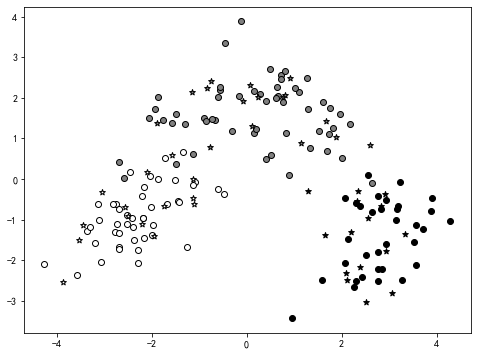

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
for i,color,name in zip(np.unique(y),['white','grey','black'],wine.target_names):
    plt.scatter(X_train_pca[y_train==i,0],X_train_pca[y_train==i,1],c=color,marker='o',edgecolors='k',label=name)
    plt.scatter(X_test_pca[y_test==i,0],X_test_pca[y_test==i,1],c=color,marker='*',edgecolors='k',label=name)